In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [49]:
kyp = pd.read_csv(r'..\Cases\Kyphosis\Kyphosis.csv')
kyp.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [50]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(kyp['Kyphosis'])
X = kyp.drop('Kyphosis', axis=1)
print(X)
print(le.classes_)

    Age  Number  Start
0    71       3      5
1   158       3     14
2   128       4      5
3     2       5      1
4     1       4     15
..  ...     ...    ...
76  157       3     13
77   26       7     13
78  120       2     13
79   42       7      6
80   36       4     13

[81 rows x 3 columns]
['absent' 'present']


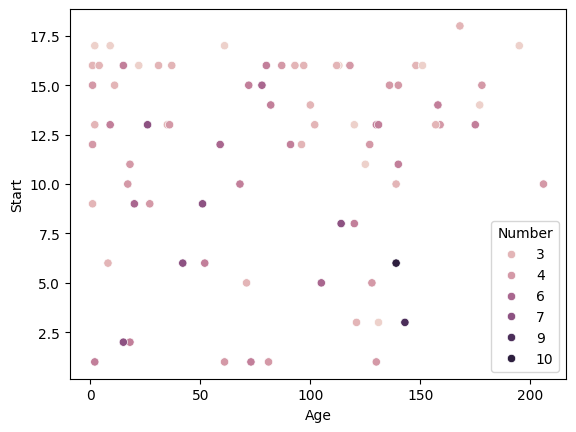

In [51]:
sns.scatterplot(data=X, x='Age',y='Start',
                hue='Number')
plt.show()

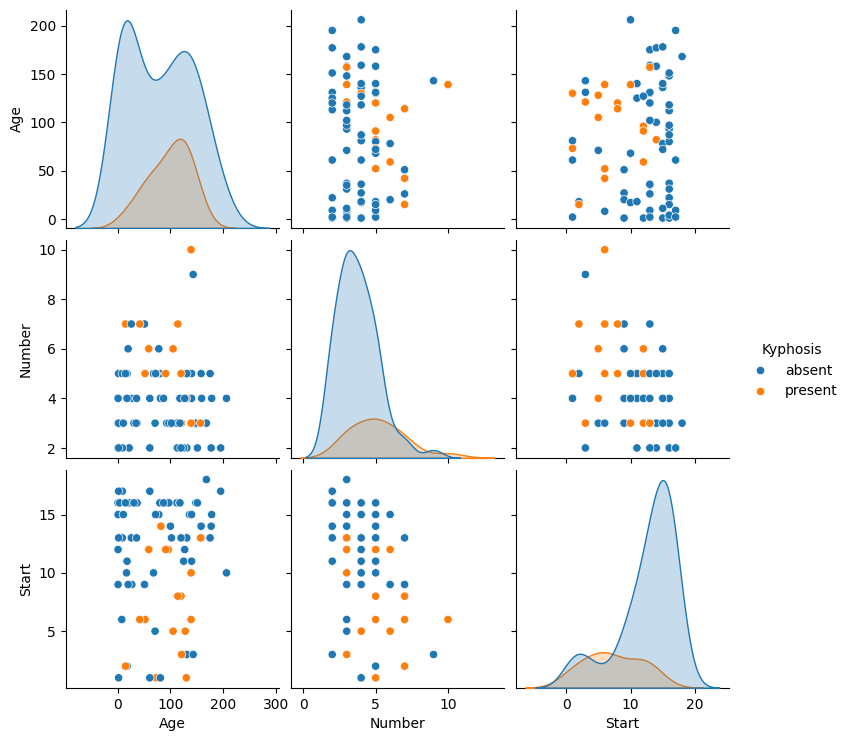

In [52]:
sns.pairplot(data=kyp, hue='Kyphosis')
plt.show()

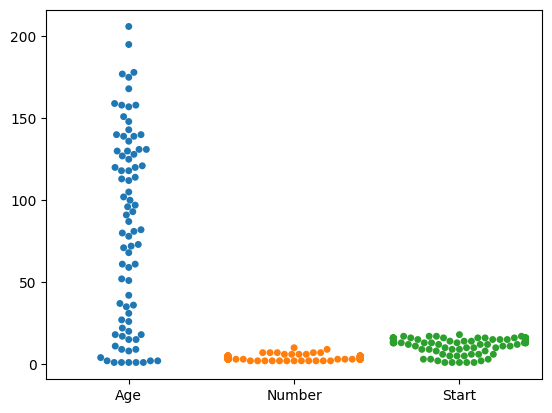

In [53]:
sns.swarmplot(data=kyp)
plt.show()

In [57]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline


kfold = StratifiedKFold(shuffle=True, random_state=24, n_splits=5)

dtc = DecisionTreeClassifier(random_state=24)
dtc.fit(X, y)

# pipe = Pipeline([('DTC', dtc)])

# print(pipe.get_params())

params = {'max_depth': [None,4,3,2], 
          'min_samples_split': [2,4,6,10,20],
          'min_samples_leaf': [1,5,10,15]}

gcv = GridSearchCV(dtc, param_grid=params, cv=kfold, scoring='neg_log_loss')

gcv.fit(X, y)

print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 20}
-0.8025112313520752


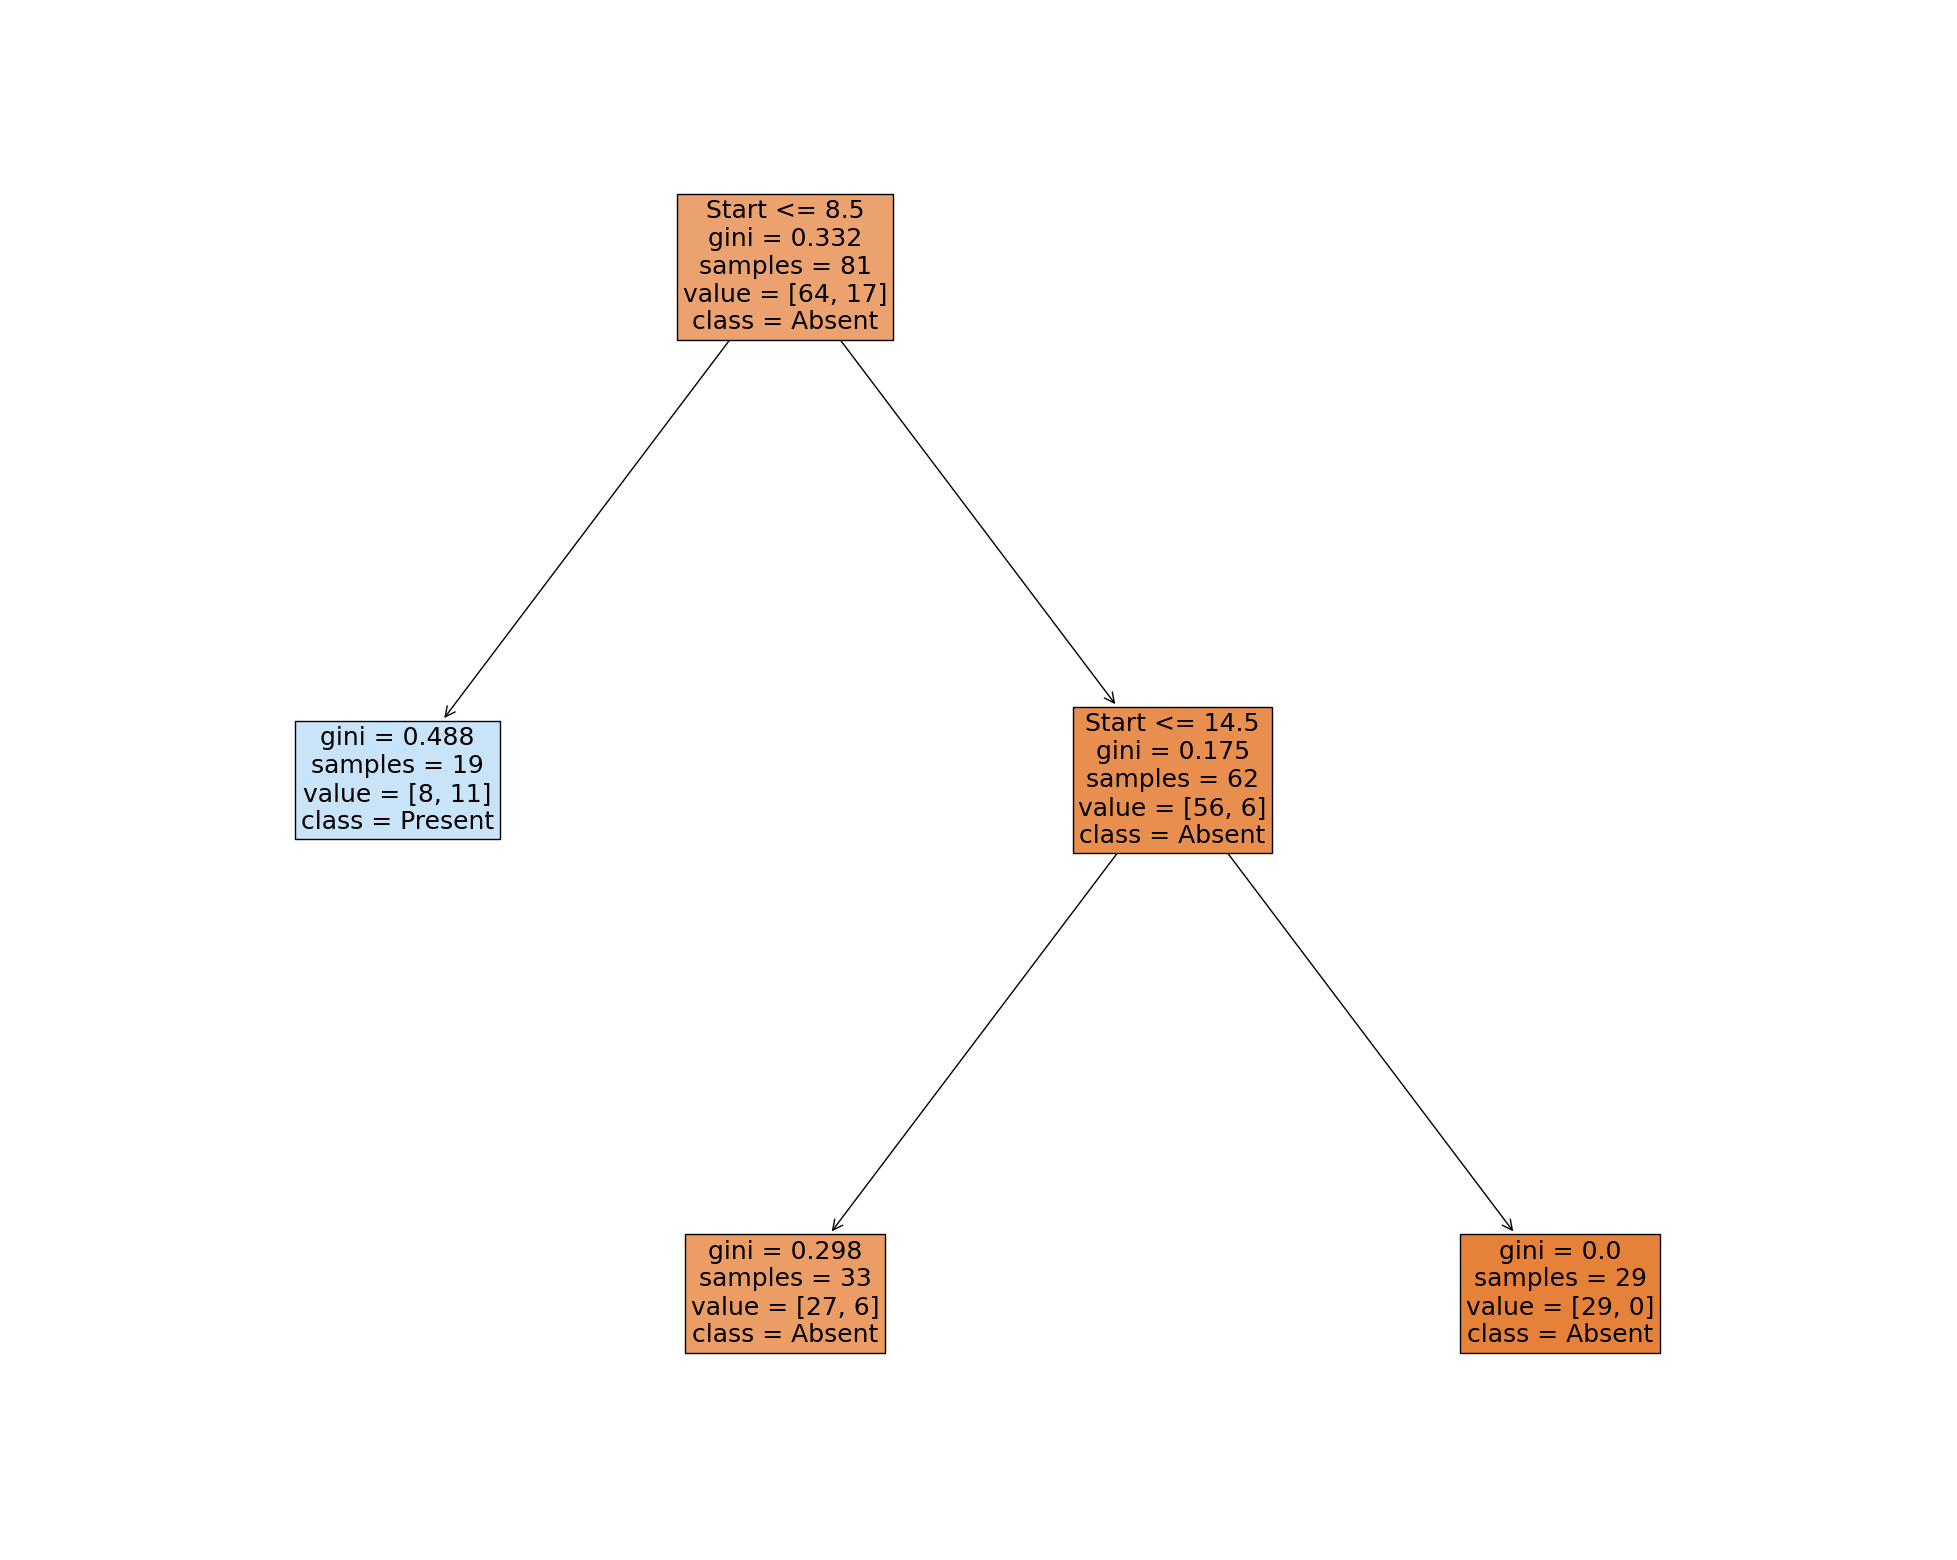

In [59]:
best_tree = gcv.best_estimator_

plt.figure(figsize=(25,20))
plot_tree(best_tree,feature_names=list(X.columns),
               class_names=['Absent','Present'],
               filled=True,fontsize=18
               )
plt.show() 